In [1]:
# %matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch

## Rendering Classes

### 3D Arrows

This class will draw arrows/vectors in 3D plots.

In [2]:
class Arrow3D(FancyArrowPatch):
    """Draw an arrow in 3D."""

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

### 3D Spheres and Ellipsoids

Encapsulate the surface coordinates for a 3D sphere that can be drawn by matplotlib. 

In [3]:
class Ellipsoid:
    """Define surface of an ellipsoid centered at location (xc,yc,zc)."""
    
    def __init__(self, radius=[1.,1.,1.], xc=0., yc=0., zc=0., eigv1=None, eigv2=None, eigv3=None):
        """Initialize the ellipsoid.
        
        :param radius: list of semi-axis lengths a, b, and c.
        :param xc: x-coordinate of sphere center.
        :param yc: y-coordinate of sphere center.
        :param zc: z-coordinate of sphere center.
        :param eigv1: vector of semimajor axis 1 (x-axis by default).
        :param eigv2: vector of semimajor axis 2 (y-axis by default).
        :param eigv3: vector of semimajor axis 3 (z-axis by default).
        
        If the eigenvectors are nonzero, then the radii should be the inverse square
        of the corresponding eigenvectors. E.g., a=1/sqrt(e1), b=1/sqrt(e2), c=1/sqrt(e3).
        """
        a, b, c = radius
        
        xyz = np.asarray([xc, yc, zc])
        
        # Parametric equations for a sphere:
        u = np.linspace(0.0, 2.0 * np.pi, 60)
        v = np.linspace(0.0, np.pi, 60)
        x = a * np.outer(np.cos(u), np.sin(v))
        y = b * np.outer(np.sin(u), np.sin(v))
        z = c * np.outer(np.ones_like(u), np.cos(v))
        
        # Rotate the ellipsoid if it's not oriented with the existing coordinate system.
        if eigv1 is not None and eigv2 is not None and eigv3 is not None:
            rotation = np.asarray([eigv1, eigv2, eigv3])
            
            for i in range(len(x)):
                for j in range(len(x)):
                    [x[i,j], y[i,j], z[i,j]] = np.dot([x[i,j], y[i,j], z[i,j]], rotation) + xyz
        else:
            x += xc
            y += yc
            z += zc
        
        self.x,  self.y,  self.z  = x,  y,  z
        self.xc, self.yc, self.zc = xc, yc, zc

class Sphere(Ellipsoid):
    """Define surface of a sphere centered at location (xc,yc,zc)."""
    
    def __init__(self, radius=1., xc=0., yc=0., zc=0.):
        """Initialize the sphere.
        
        :param radius: radius of the sphere.
        :param xc: x-coordinate of sphere center.
        :param yc: y-coordinate of sphere center.
        :param zc: z-coordinate of sphere center.
        """
        self.radius = radius
        
        super().__init__([radius, radius, radius], xc, yc, zc)

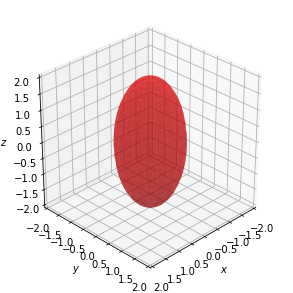

In [4]:
e = Ellipsoid(radius=[1,1,2])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(e.x, e.y, e.z, rstride=3, cstride=3,
                color='r', linewidth=0.1, alpha=0.5, shade=True)
ax.set(xlabel='$x$', xlim=(-2,2),
       ylabel='$y$', ylim=(-2,2),
       zlabel='$z$', zlim=(-2,2),
       aspect='equal');

ax.view_init(30,45)

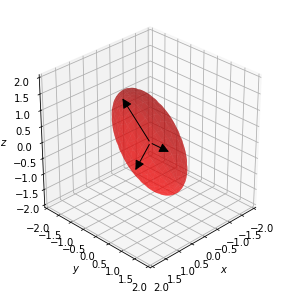

In [5]:
eigv1 = np.array([0.193,0.967,0.166])
eigv2 = np.array([0.854,0.249,-0.457])
eigv3 = np.array([0.484,-0.0533,0.874])

e = Ellipsoid(radius=[1,1,2], xc=0., yc=0., zc=0., eigv1=eigv1, eigv2=eigv2, eigv3=eigv3)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(e.x, e.y, e.z, rstride=3, cstride=3,
                color='r', linewidth=0.1, alpha=0.5, shade=True)
ax.set(xlabel='$x$', xlim=(-2,2),
       ylabel='$y$', ylim=(-2,2),
       zlabel='$z$', zlim=(-2,2),
       aspect='equal')

a = Arrow3D([0,eigv1[0]], [0,eigv1[1]], [0,eigv1[2]], mutation_scale=20,
        lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)

a = Arrow3D([0,eigv2[0]], [0,eigv2[1]], [0,eigv2[2]], mutation_scale=20,
        lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)

a = Arrow3D([0,2*eigv3[0]], [0,2*eigv3[1]], [0,2*eigv3[2]], mutation_scale=20,
        lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)

ax.view_init(30,45)

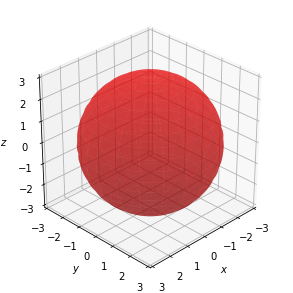

In [6]:
s = Sphere(radius=3)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(s.x, s.y, s.z, rstride=3, cstride=3,
                color='r', linewidth=0.1, alpha=0.5, shade=True)
ax.set(xlabel='$x$', xlim=(-3,3),
       ylabel='$y$', ylim=(-3,3),
       zlabel='$z$', zlim=(-3,3),
       aspect='equal')

ax.view_init(30,45)